Pour une entreprise ne disposant d'aucun historique d'achat d'articles par les utilisateurs, un système de recommandation basé sur un moteur de recherche peut être conçu pour les utilisateurs. 

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook


In [12]:
import os 
for dirname, _, filenames in os.walk('C:\\Users\\Matec Pro\\Documents\\\cours\\Master 2\\modelisation'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Matec Pro\Documents\\cours\Master 2\modelisation\attributes.csv
C:\Users\Matec Pro\Documents\\cours\Master 2\modelisation\product_descriptions.csv
C:\Users\Matec Pro\Documents\\cours\Master 2\modelisation\relevance_instructions.docx
C:\Users\Matec Pro\Documents\\cours\Master 2\modelisation\sample_submission.csv
C:\Users\Matec Pro\Documents\\cours\Master 2\modelisation\test.csv
C:\Users\Matec Pro\Documents\\cours\Master 2\modelisation\train.csv


In [13]:
att=pd.read_csv('C:\\Users\\Matec Pro\\Documents\\\cours\\Master 2\\modelisation\\attributes.csv')
desc=pd.read_csv('C:\\Users\\Matec Pro\\Documents\\\cours\\Master 2\\modelisation\\product_descriptions.csv')
train=pd.read_csv('C:\\Users\\Matec Pro\\Documents\\\cours\\Master 2\\modelisation\\train.csv', encoding='ISO-8859-1')
test=pd.read_csv('C:\\Users\\Matec Pro\\Documents\\\cours\\Master 2\\modelisation\\test.csv',encoding='ISO-8859-1')

In [14]:
desc.shape

(124428, 2)

In [15]:
desc.describe(include='all')

,product_uid,product_description
count,124428.000000,124428
unique,NaN,110128
top,NaN,Team spirit by the gallon. With the officially...
freq,NaN,43
mean,162214.500000,NaN
std,35919.413985,NaN
min,100001.000000,NaN
25%,131107.750000,NaN
50%,162214.500000,NaN
75%,193321.250000,NaN


In [16]:
desc.head(10)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
5,100006,Achieving delicious results is almost effortle...
6,100007,The Quantum Adjustable 2-Light LED Black Emerg...
7,100008,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,100009,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,100010,Valley View Industries Metal Stakes (4-Pack) a...


In [17]:
print(desc.columns)

Index(['product_uid', 'product_description'], dtype='object')


In [18]:
desc.isnull().sum()

product_uid            0
product_description    0
dtype: int64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74067 non-null  int64  
 1   product_uid    74067 non-null  int64  
 2   product_title  74067 non-null  object 
 3   search_term    74067 non-null  object 
 4   relevance      74067 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [20]:
train.head(5)

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [21]:
train['relevance'].describe()

count    74067.000000
mean         2.381634
std          0.533984
min          1.000000
25%          2.000000
50%          2.330000
75%          3.000000
max          3.000000
Name: relevance, dtype: float64

In [22]:
!pip install scikit-learn

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [25]:
product_descriptions = pd.read_csv('C:\\Users\\Matec Pro\\Documents\\\cours\\Master 2\\modelisation\\product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [26]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [27]:
product_descriptions1 = product_descriptions.head(500)


product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [28]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

<IPython.core.display.Javascript object>


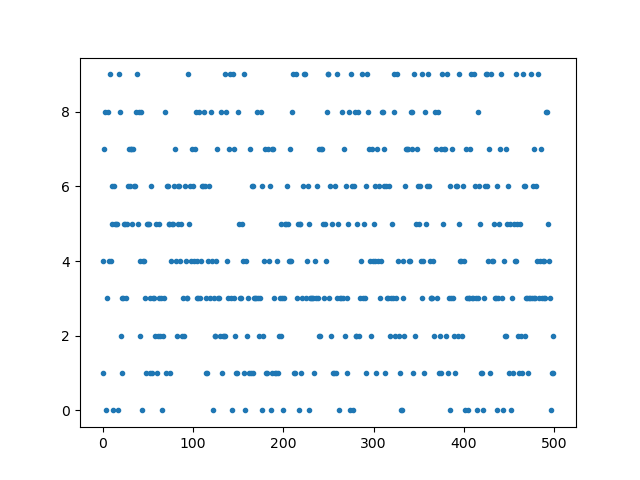

In [29]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [31]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [32]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 storage
 shelves
 room
 adjustable
 lbs
 drawer
 finish
 shelving
 shelf
 unit
Cluster 1:
 post
 landscape
 recycled
 ft
 steel
 used
 100
 stake
 fence
 wood
Cluster 2:
 tool
 brush
 easy
 bag
 pet
 dust
 power
 garage
 motor
 dog
Cluster 3:
 wall
 piece
 use
 tile
 indoor
 recommended
 plate
 natural
 finish
 commercial
Cluster 4:
 air
 power
 cooling
 unit
 volt
 led
 control
 ft
 000
 insulation
Cluster 5:
 bamboo
 window
 natural
 shades
 cabinet
 pull
 rug
 size
 mount
 wood
Cluster 6:
 frame
 patio
 collection
 steel
 bronze
 fabric
 dining
 door
 outdoor
 coated
Cluster 7:
 water
 easy
 toilet
 tank
 heater
 design
 use
 provides
 gal
 gas
Cluster 8:
 ft
 10
 easy
 paint
 concrete
 sq
 use
 ladder
 cutting
 24
Cluster 9:
 light
 metal
 fan
 watt
 need
 speed
 bulb
 blades
 clear
 home


C:\Users\Matec Pro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
def prediction(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [34]:
prediction("cutting tool")

Cluster 2:
 tool
 brush
 easy
 bag
 pet
 dust
 power
 garage
 motor
 dog


In [35]:
prediction("spray paint")

Cluster 8:
 ft
 10
 easy
 paint
 concrete
 sq
 use
 ladder
 cutting
 24


In [36]:
prediction("steel drill")

Cluster 9:
 light
 metal
 fan
 watt
 need
 speed
 bulb
 blades
 clear
 home


In [37]:
prediction("water")

Cluster 7:
 water
 easy
 toilet
 tank
 heater
 design
 use
 provides
 gal
 gas


In [38]:
prediction("chair")

Cluster 9:
 light
 metal
 fan
 watt
 need
 speed
 bulb
 blades
 clear
 home


In [39]:
prediction("tabble")

Cluster 7:
 water
 easy
 toilet
 tank
 heater
 design
 use
 provides
 gal
 gas


In [40]:
prediction("home")

Cluster 9:
 light
 metal
 fan
 watt
 need
 speed
 bulb
 blades
 clear
 home
